In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats import multitest

# Why do I always fucking forget how to do this. There should be a global default.
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)

#With 15 generations
cmp_mean_res = pd.read_csv("../../mean15/SIMOUT.txt", sep="\t", header=0)
cmp_pw_res = pd.read_csv("../../speedtest/SIMOUT.txt", sep="\t", header=0)

#With random gamma
cmp_mean_res0 = pd.read_csv("../../mean_competition/SIMOUT.txt", sep="\t", header=0)
cmp_pw_res0 = pd.read_csv("../../pairwise15/SIMOUT.txt", sep="\t", header=0)

#Older version of pairwise (random gamma)
cmp_pw_old = pd.read_csv("../../pairwise_competition/SIMOUT.txt", sep="\t", header=0)
cmp_pw_no_apprx = pd.read_csv("../../pairwise_no_apprx/SIMOUT.txt", sep="\t", header=0)

# Sumstats start at "S" which is index 21, e.g. cmp_mean_res.iloc[:, 21:]
ss_start_idx = list(cmp_mean_res.columns).index("S")
ss_columns = cmp_mean_res.columns[21:]
cmp_pw_res

,S_m,J_m,speciation_rate,death_proportion,trait_rate_meta,ecological_strength,generations,community_assembly_model,speciation_model,mutation_rate,alpha,sequence_length,J,m,speciation_prob,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,abundance_dxy_cor,abundance_pi_cor,abundance_trait_cor,dxy_pi_cor,dxy_trait_cor,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
0,100,750000,2.0,0.7,2.0,1.0,15,pairwise_competition,point_mutation,0.0,2000,570.0,1000.0,0.01,0.0,15.0,0.062,0.00987,0.00200,0.58824,2.26030,12.0,1.30285,1.08932,1.06648,1.05888,1.00000,1.00000,1.00000,1.00000,0.00007,0.00023,3.01511,7.09091,0.0,0.00000,0.00487,0.00507,1.47022,1.36037,0.00289,0.00557,0.0,14.80618,13.01220,12.34605,11.96607,2.88272,2.43540,-0.28465,-0.72621,3.21297,2.20240,2.04820,2.30193,-0.22741,-0.66092,2.52689,3.37106,-0.83451,-0.13347,0.05725,0.06529,-0.68608,1.16866,0.49473,-0.17655,-0.01060,-0.13101,-0.30769,0.04367,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100,750000,2.0,0.7,2.0,1.0,15,pairwise_competition,point_mutation,0.0,2000,570.0,1000.0,0.01,0.0,15.0,0.090,0.01067,0.00267,0.58824,-4.48728,10.0,1.46680,1.16423,1.12221,1.10795,3.79054,3.62894,3.50508,3.40855,0.00026,0.00035,0.80507,-0.97974,0.0,0.00056,0.00814,0.01252,2.26527,3.81198,0.00368,0.00798,0.0,13.67173,10.06941,8.54773,7.78113,-2.20687,1.56698,-0.54451,-0.48141,-2.12648,2.19616,-1.70603,2.22627,0.83681,0.98757,-2.09903,3.42079,0.50084,0.65929,1.38133,1.46897,0.02745,1.22463,0.77067,-0.15504,-0.72174,0.10242,-0.49091,0.57354,6.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
2,100,750000,2.0,0.7,2.0,1.0,15,pairwise_competition,point_mutation,0.0,2000,570.0,1000.0,0.01,0.0,15.0,0.080,0.01040,0.00293,0.58824,-9.24187,11.0,1.38515,1.13047,1.09724,1.08600,3.00000,3.00000,3.00000,3.00000,0.00010,0.00016,1.02062,-0.95833,0.0,0.00018,0.00453,0.00852,2.57090,5.11005,0.00175,0.00289,0.0,9.07941,7.47500,7.02356,6.83288,-4.28985,2.70466,0.26180,-1.31821,-4.38216,4.46075,-3.33121,3.21154,0.31731,-0.98824,-3.75234,5.44204,0.95865,0.50688,0.05552,0.32997,0.62982,0.98128,0.11215,0.32878,0.06483,0.13029,-0.06422,0.45185,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,100,750000,2.0,0.7,2.0,1.0,15,pairwise_competition,point_mutation,0.0,2000,570.0,1000.0,0.01,0.0,15.0,0.100,0.01147,0.00253,0.58824,3.27682,16.0,1.65088,1.20092,1.14816,1.13068,1.99409,1.98824,1.98248,1.97685,0.00010,0.00025,2.29811,3.34119,0.0,0.00000,0.00269,0.00399,2.20207,4.45806,0.00123,0.00311,0.0,13.40963,10.55959,9.66741,9.22305,0.44504,1.80489,0.50393,-0.71091,-0.12771,2.56810,0.49207,2.58005,0.53557,0.33886,0.11696,2.86081,0.04703,0.77516,0.03164,1.04976,0.24468,0.29271,0.73049,0.57781,-0.35622,0.35543,-0.56446,-0.03068,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,100,750000,2.0,0.7,2.0,1.0,15,pairwise_competition,point_mutation,0.0,2000,570.0,1000.0,0.01,0.0,15.0,0.072,0.01013,0.00187,0.58824,-3.07288,13.0,1.42405,1.12873,1.09550,1.08446,2.00000,2.00000,2.00000,2.00000,0.00005,0.00013,1.91881,1.68182,0.0,0.00000,0.00389,0.00460,1.19768,0.41215,0.00193,0.00526,0.0,13.49372,11.75639,11.03449,10.50898,-1.83999,3.82731,0.04860,-0.93262,-2.17085,4.41954,-2.08374,3.47393,0.16332,-0.78777,-2.11279,5.27487,-0.24374,-0.35338,0.11472,0.14485,0.05805,0.85533,0.58568,0.57456,-0.14128,0.57779,-0.08915,-0.17094,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,.

In [66]:
ttvals, ttres = stats.ttest_ind(cmp_mean_res.iloc[:, 21:], cmp_pw_res.iloc[:, 21:])
ttres = multitest.multipletests(ttres,method='bonferroni')

ttvals2, ttres2 = stats.ttest_ind(cmp_mean_res0.iloc[:, 21:], cmp_pw_res0.iloc[:, 21:])
ttres2 = multitest.multipletests(ttres2,method='bonferroni')

ttvals_old, ttres_old = stats.ttest_ind(cmp_pw_old.iloc[:, 21:], cmp_pw_res0.iloc[:, 21:])
ttres_old = multitest.multipletests(ttres_old,method='bonferroni')

ttvals_apprx, ttres_apprx = stats.ttest_ind(cmp_pw_old.iloc[:, 21:], cmp_pw_no_apprx.iloc[:, 21:])
ttres_apprx = multitest.multipletests(ttres_apprx,method='bonferroni')

#Should be corrected for multiple testing

In [31]:
pd.DataFrame(ttres, index=ss_columns).T

,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,abundance_dxy_cor,abundance_pi_cor,abundance_trait_cor,dxy_pi_cor,dxy_trait_cor,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
0,5.296364e-23,0.000459,0.000005,0.000003,0.000003,0.000075,0.00013,0.000195,0.000257,0.468427,0.094449,1.806251e-12,3.512953e-11,0.002601,0.082804,0.55378,0.098485,0.000036,0.000007,0.777594,0.002071,NaN,0.000287,0.012075,0.033475,0.052331,0.498137,7.182270e-11,0.231225,1.099725e-09,0.564344,1.284513e-09,0.370856,0.433953,0.004408,0.035209,0.180642,0.299501,0.733656,4.695357e-15,0.298954,4.698097e-07,0.649835,9.094028e-11,0.758871,0.327013,0.93535,0.66603,0.911603,0.119452,3.260720e-14,0.320403,0.07926,0.057088,0.251515,0.77137,0.40232,0.562011,0.562011,0.069686


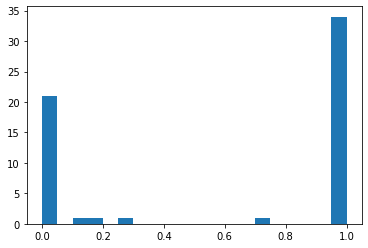

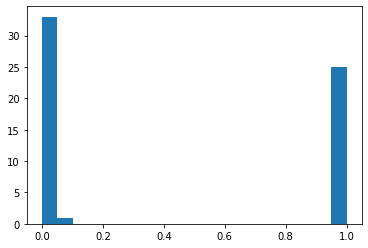

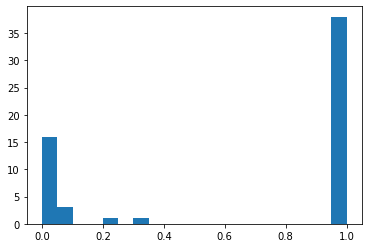

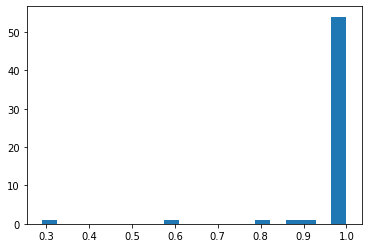

In [73]:
plt.hist(ttres[1], bins=20)
plt.show()
plt.hist(ttres2[1], bins=20)
plt.show()
plt.hist(ttres_old[1], bins=20)
plt.show()
plt.hist(ttres_apprx[1], bins=20)
plt.show()

Text(0.5, 0.98, '_lambda')

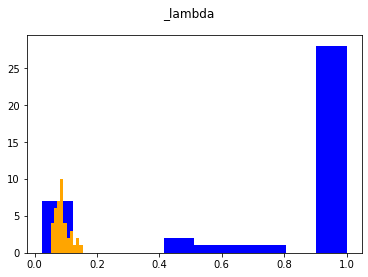

In [41]:
param = "_lambda"
plt.hist(cmp_mean_res[param], color='blue')
plt.hist(cmp_pw_res[param], color='orange')
plt.suptitle(param)

66


<ipython-input-22-0bba107dbde0>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


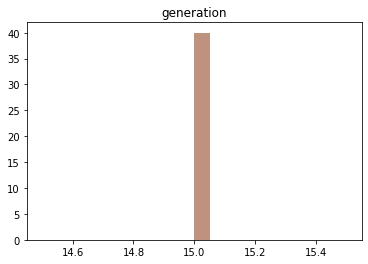

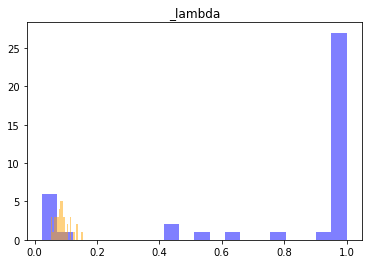

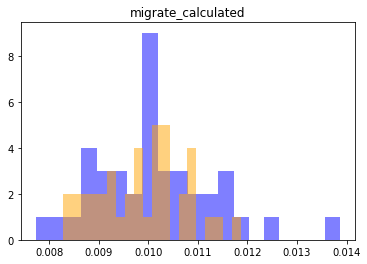

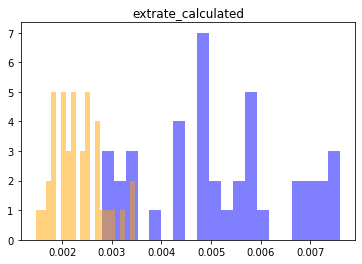

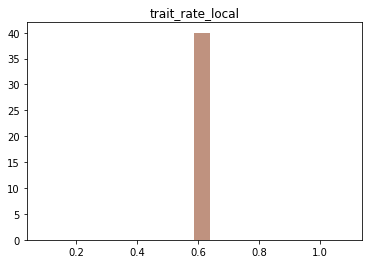

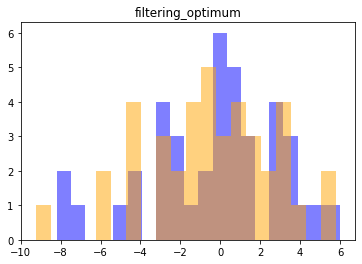

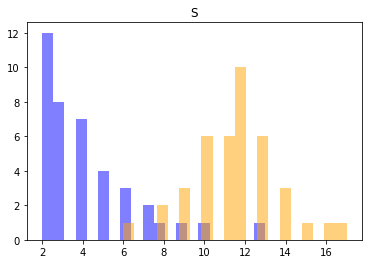

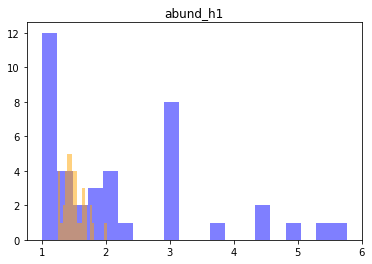

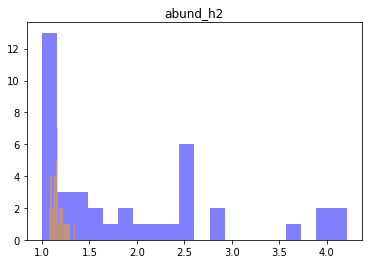

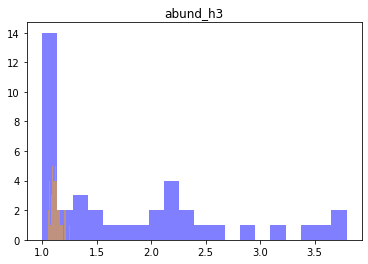

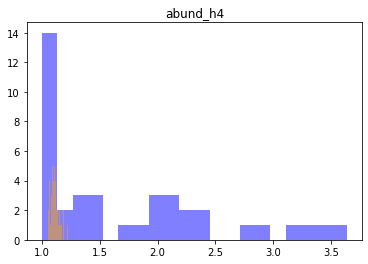

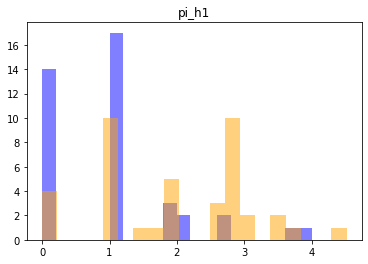

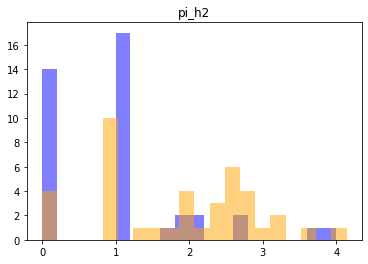

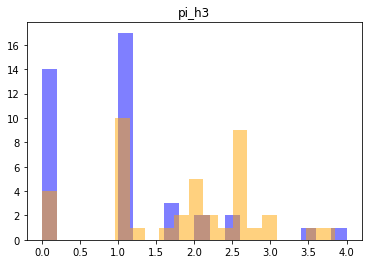

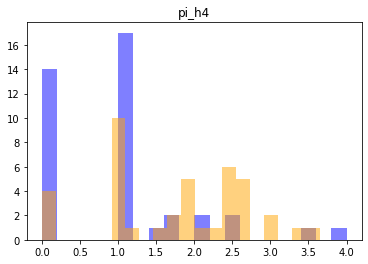

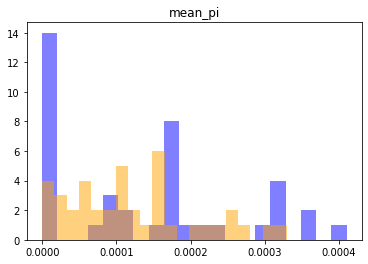

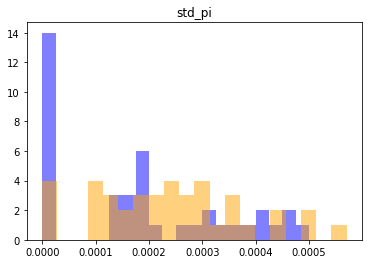

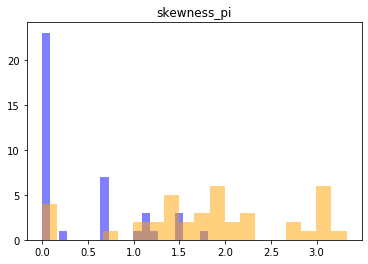

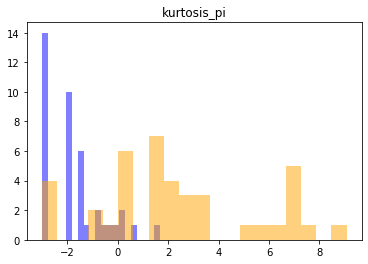

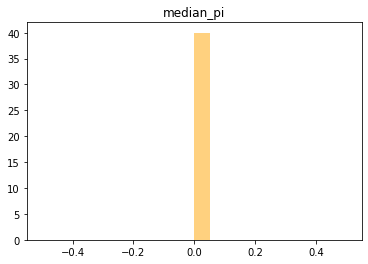

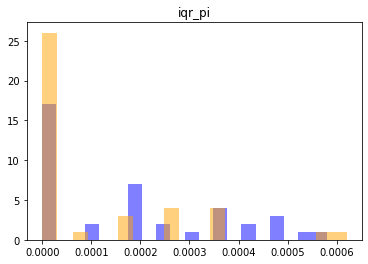

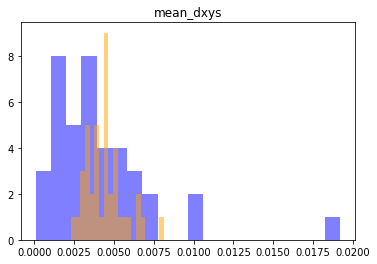

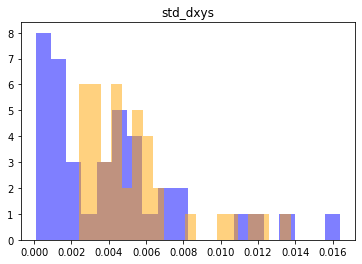

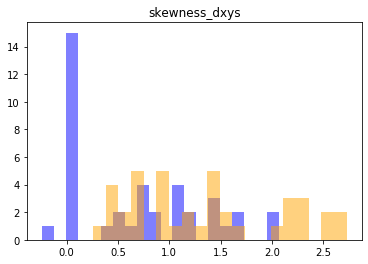

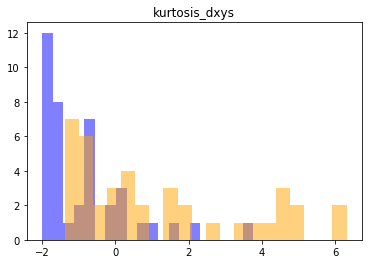

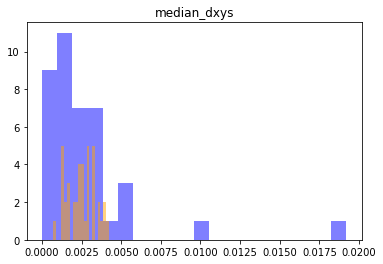

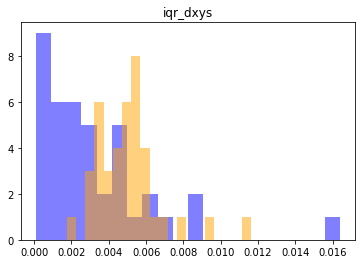

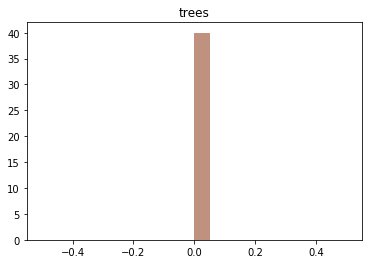

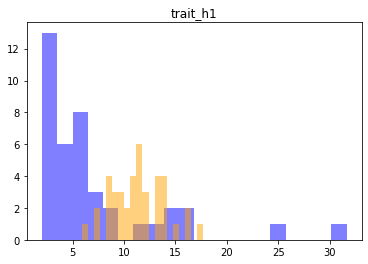

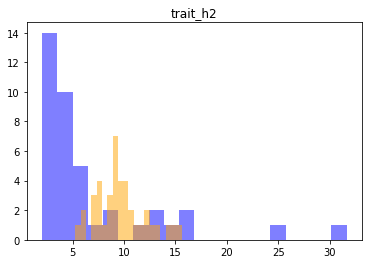

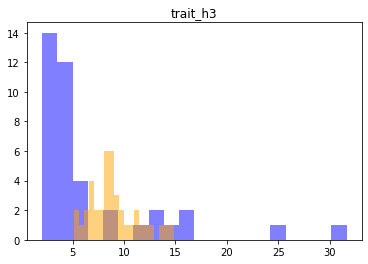

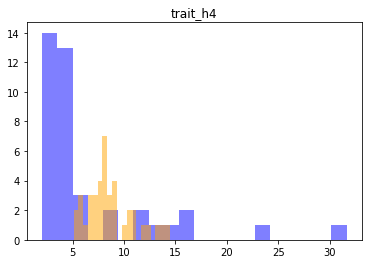

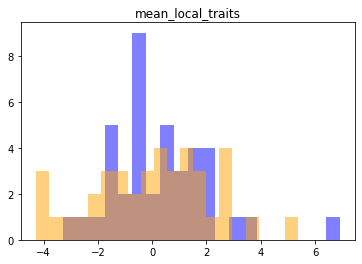

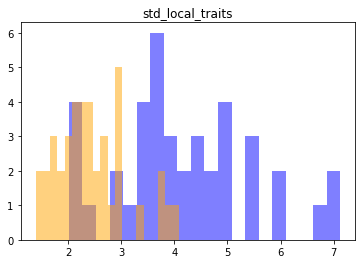

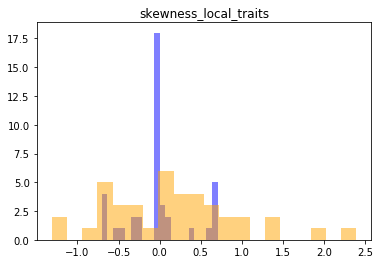

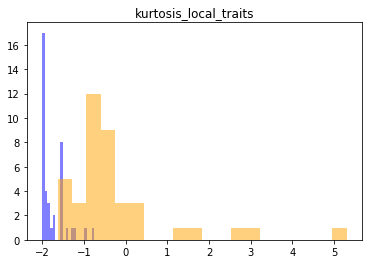

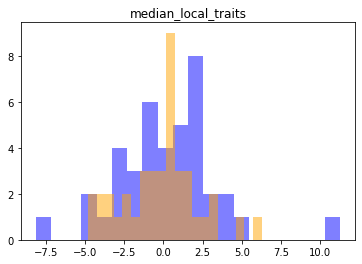

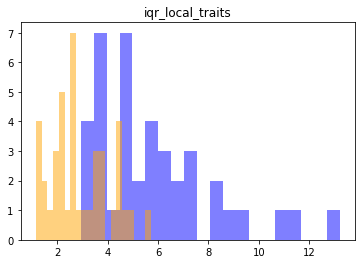

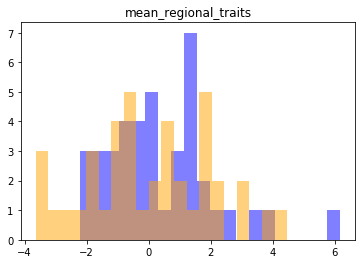

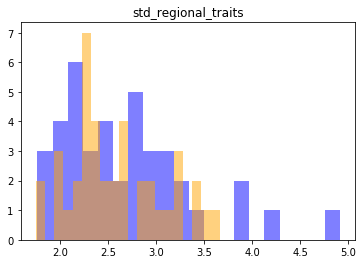

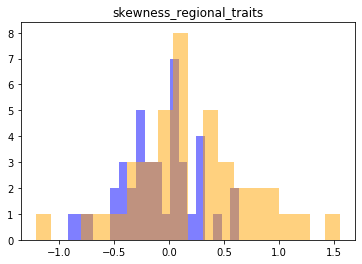

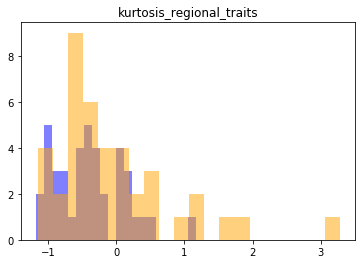

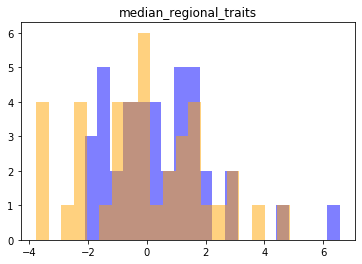

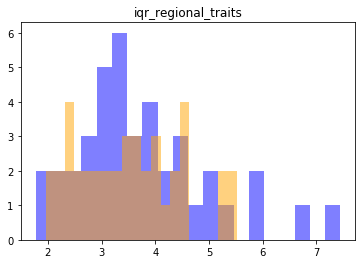

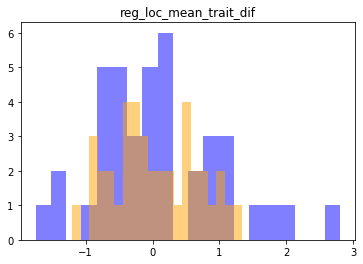

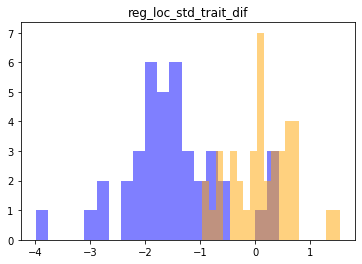

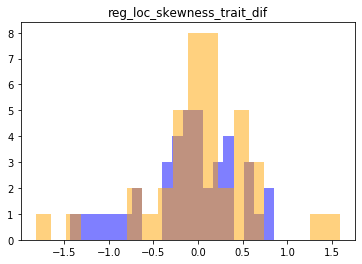

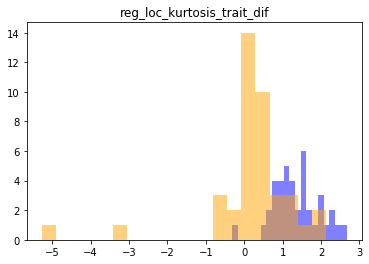

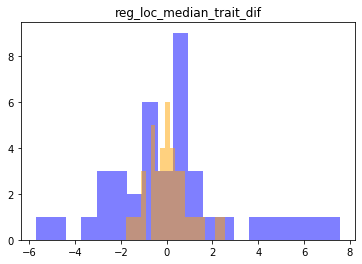

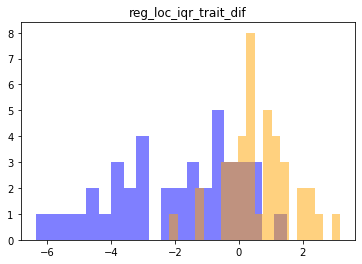

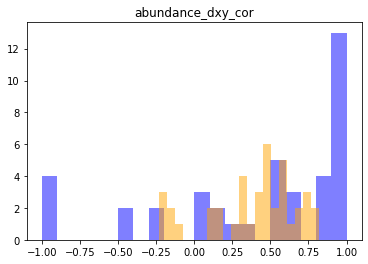

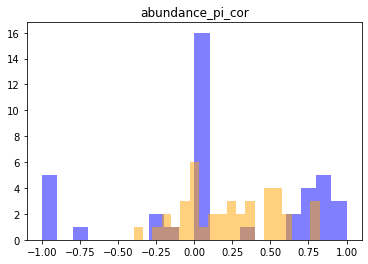

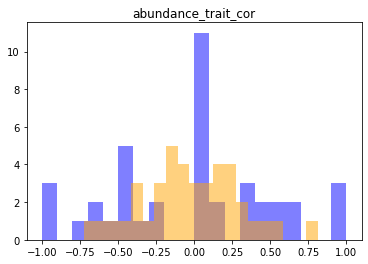

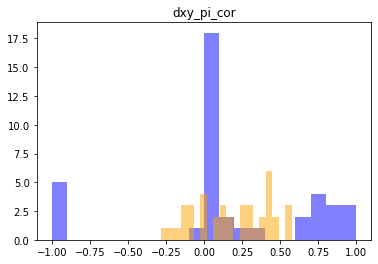

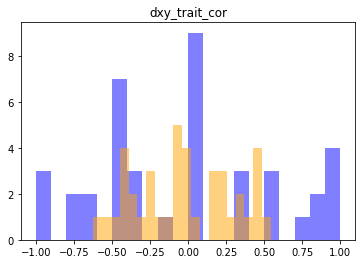

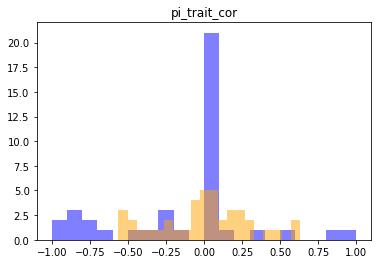

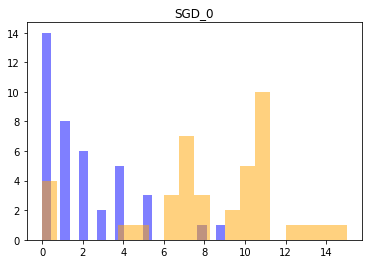

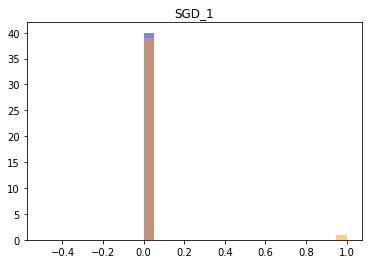

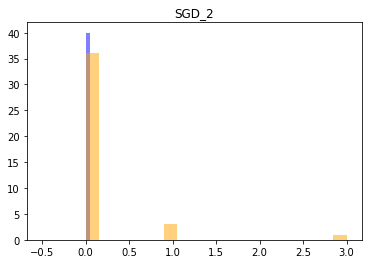

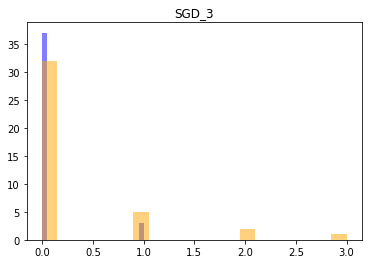

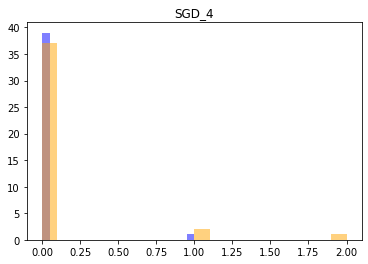

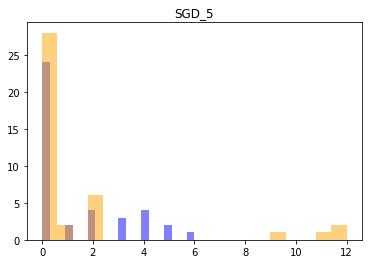

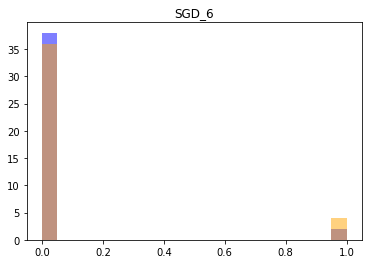

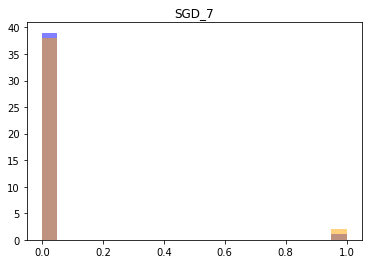

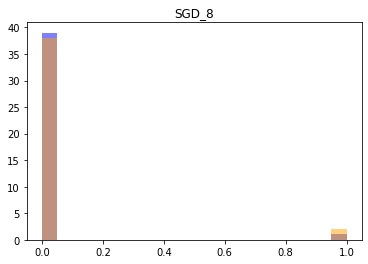

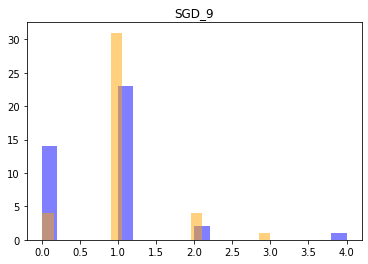

In [22]:
# How many sumstats?
print(len(cmp_mean_res.columns[15:]))
# Plot all the sumstats one at a time
for p in list(cmp_mean_res.columns)[15:]:
    fig, ax = plt.subplots()
    ax.hist(cmp_mean_res[p], color='blue', bins=20, alpha=0.5)
    ax.hist(cmp_pw_res[p], color='orange', bins=20, alpha=0.5)
    ax.set_title(p)

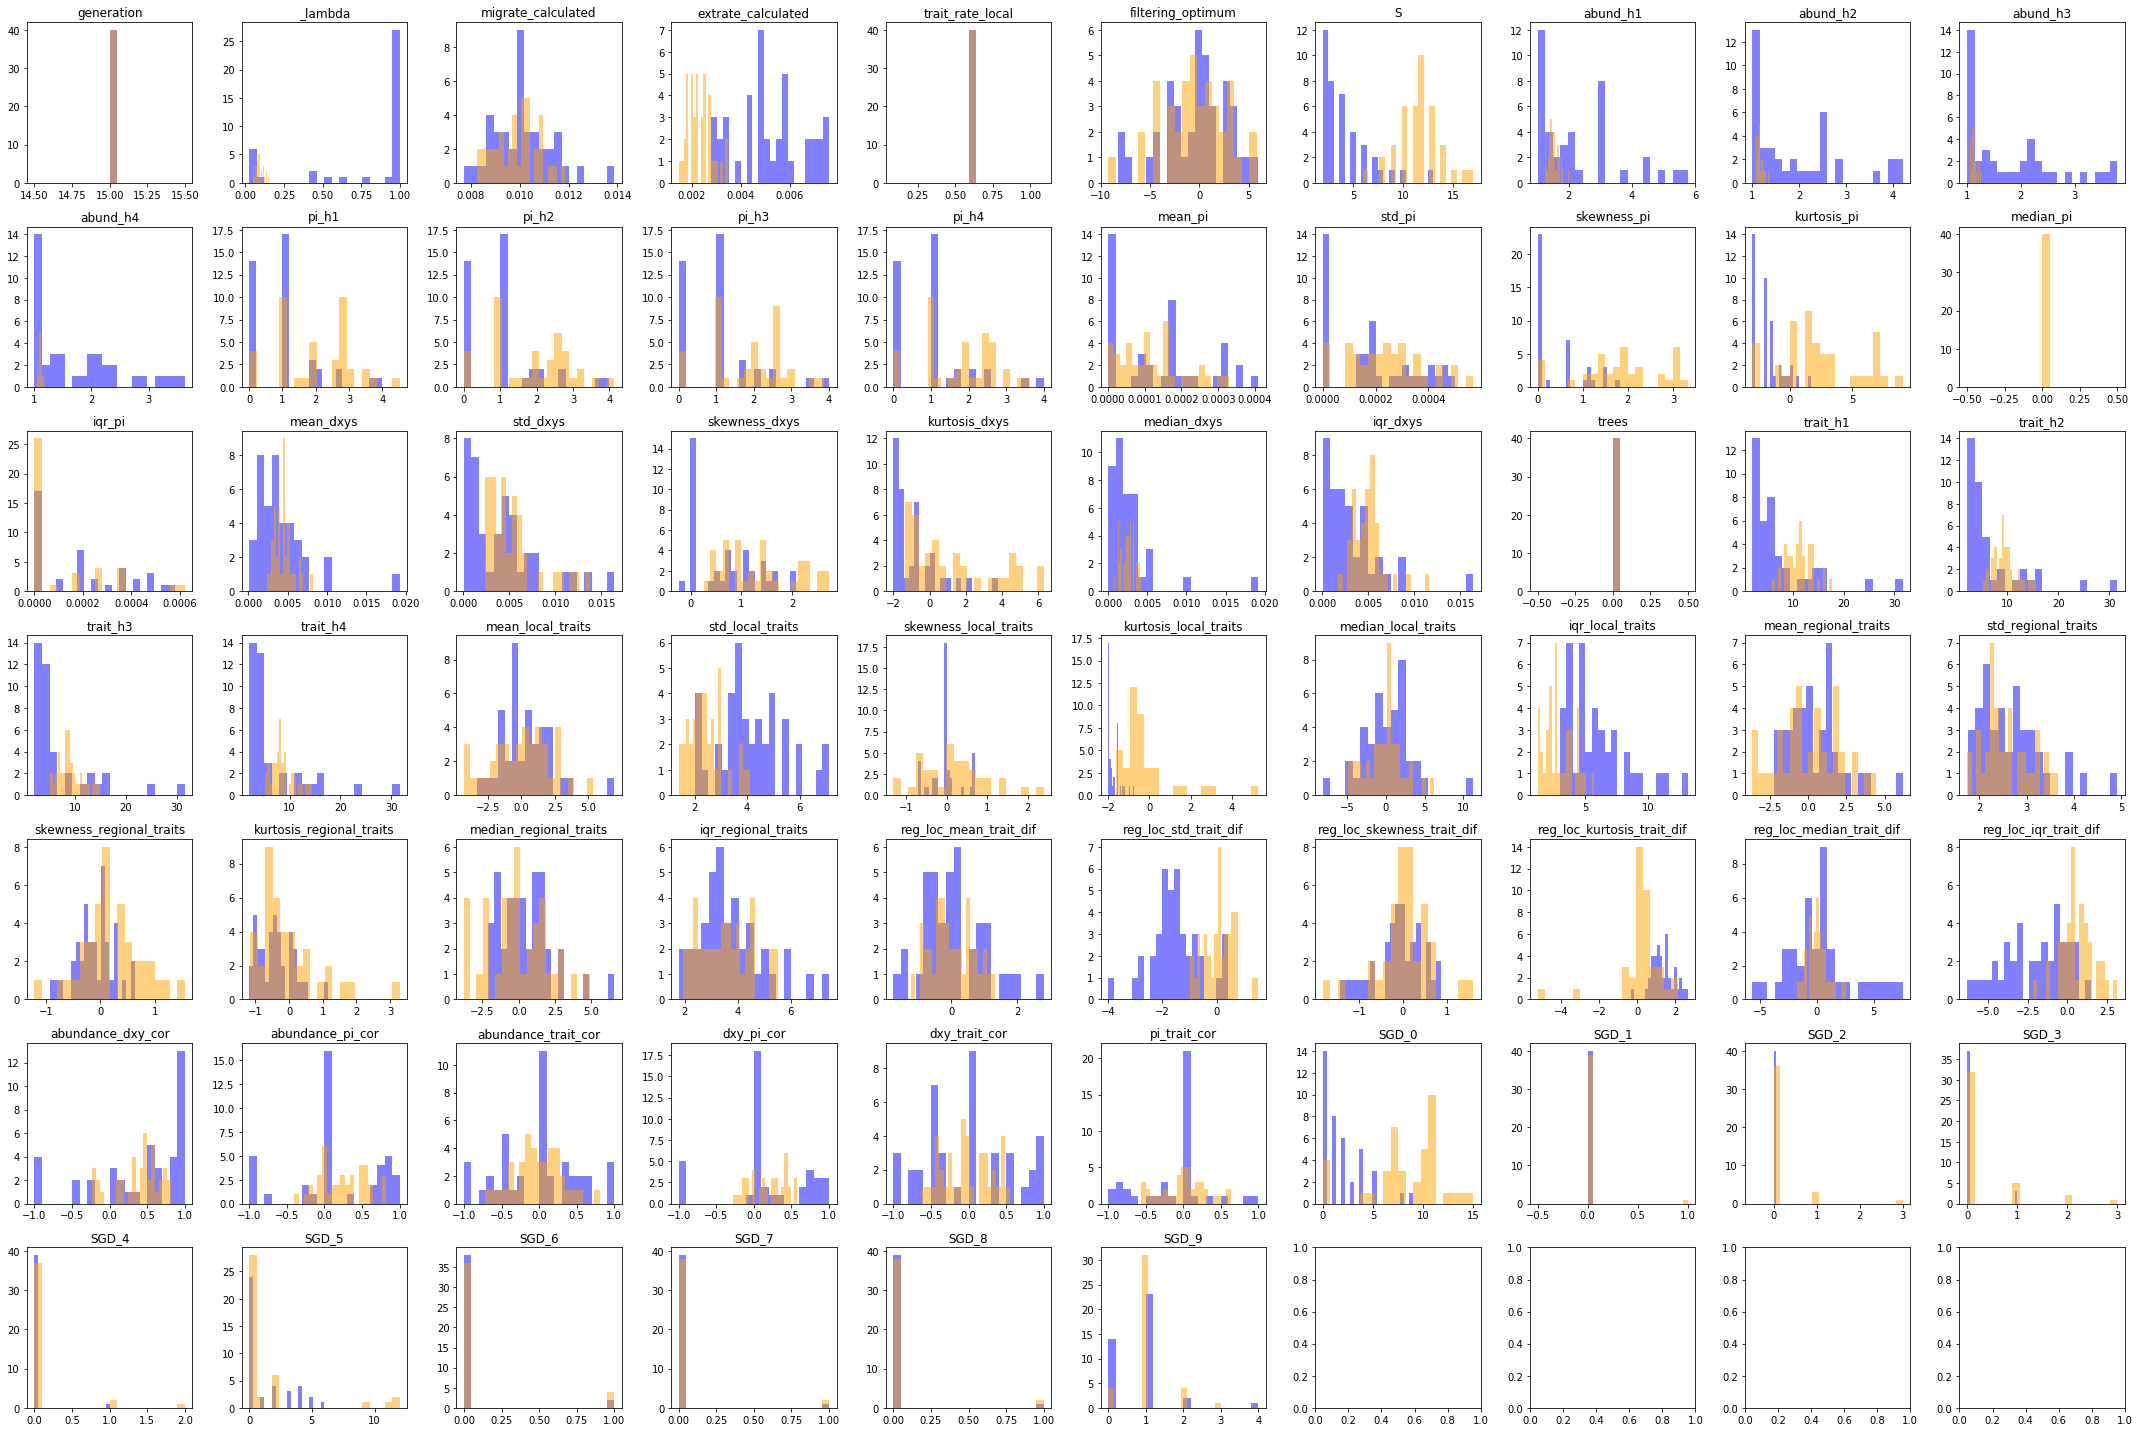

In [33]:
# This is annoying, so we can plot them in one giant figure
# Mean is blue
# pairwise is orange
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes
for p, ax in zip(list(cmp_mean_res.columns)[15:], axs):
    ax.hist(cmp_mean_res[p], color='blue', bins=20, alpha=0.5)
    ax.hist(cmp_pw_res[p], color='orange', bins=20, alpha=0.5)
    ax.set_title(p)
fig.tight_layout()

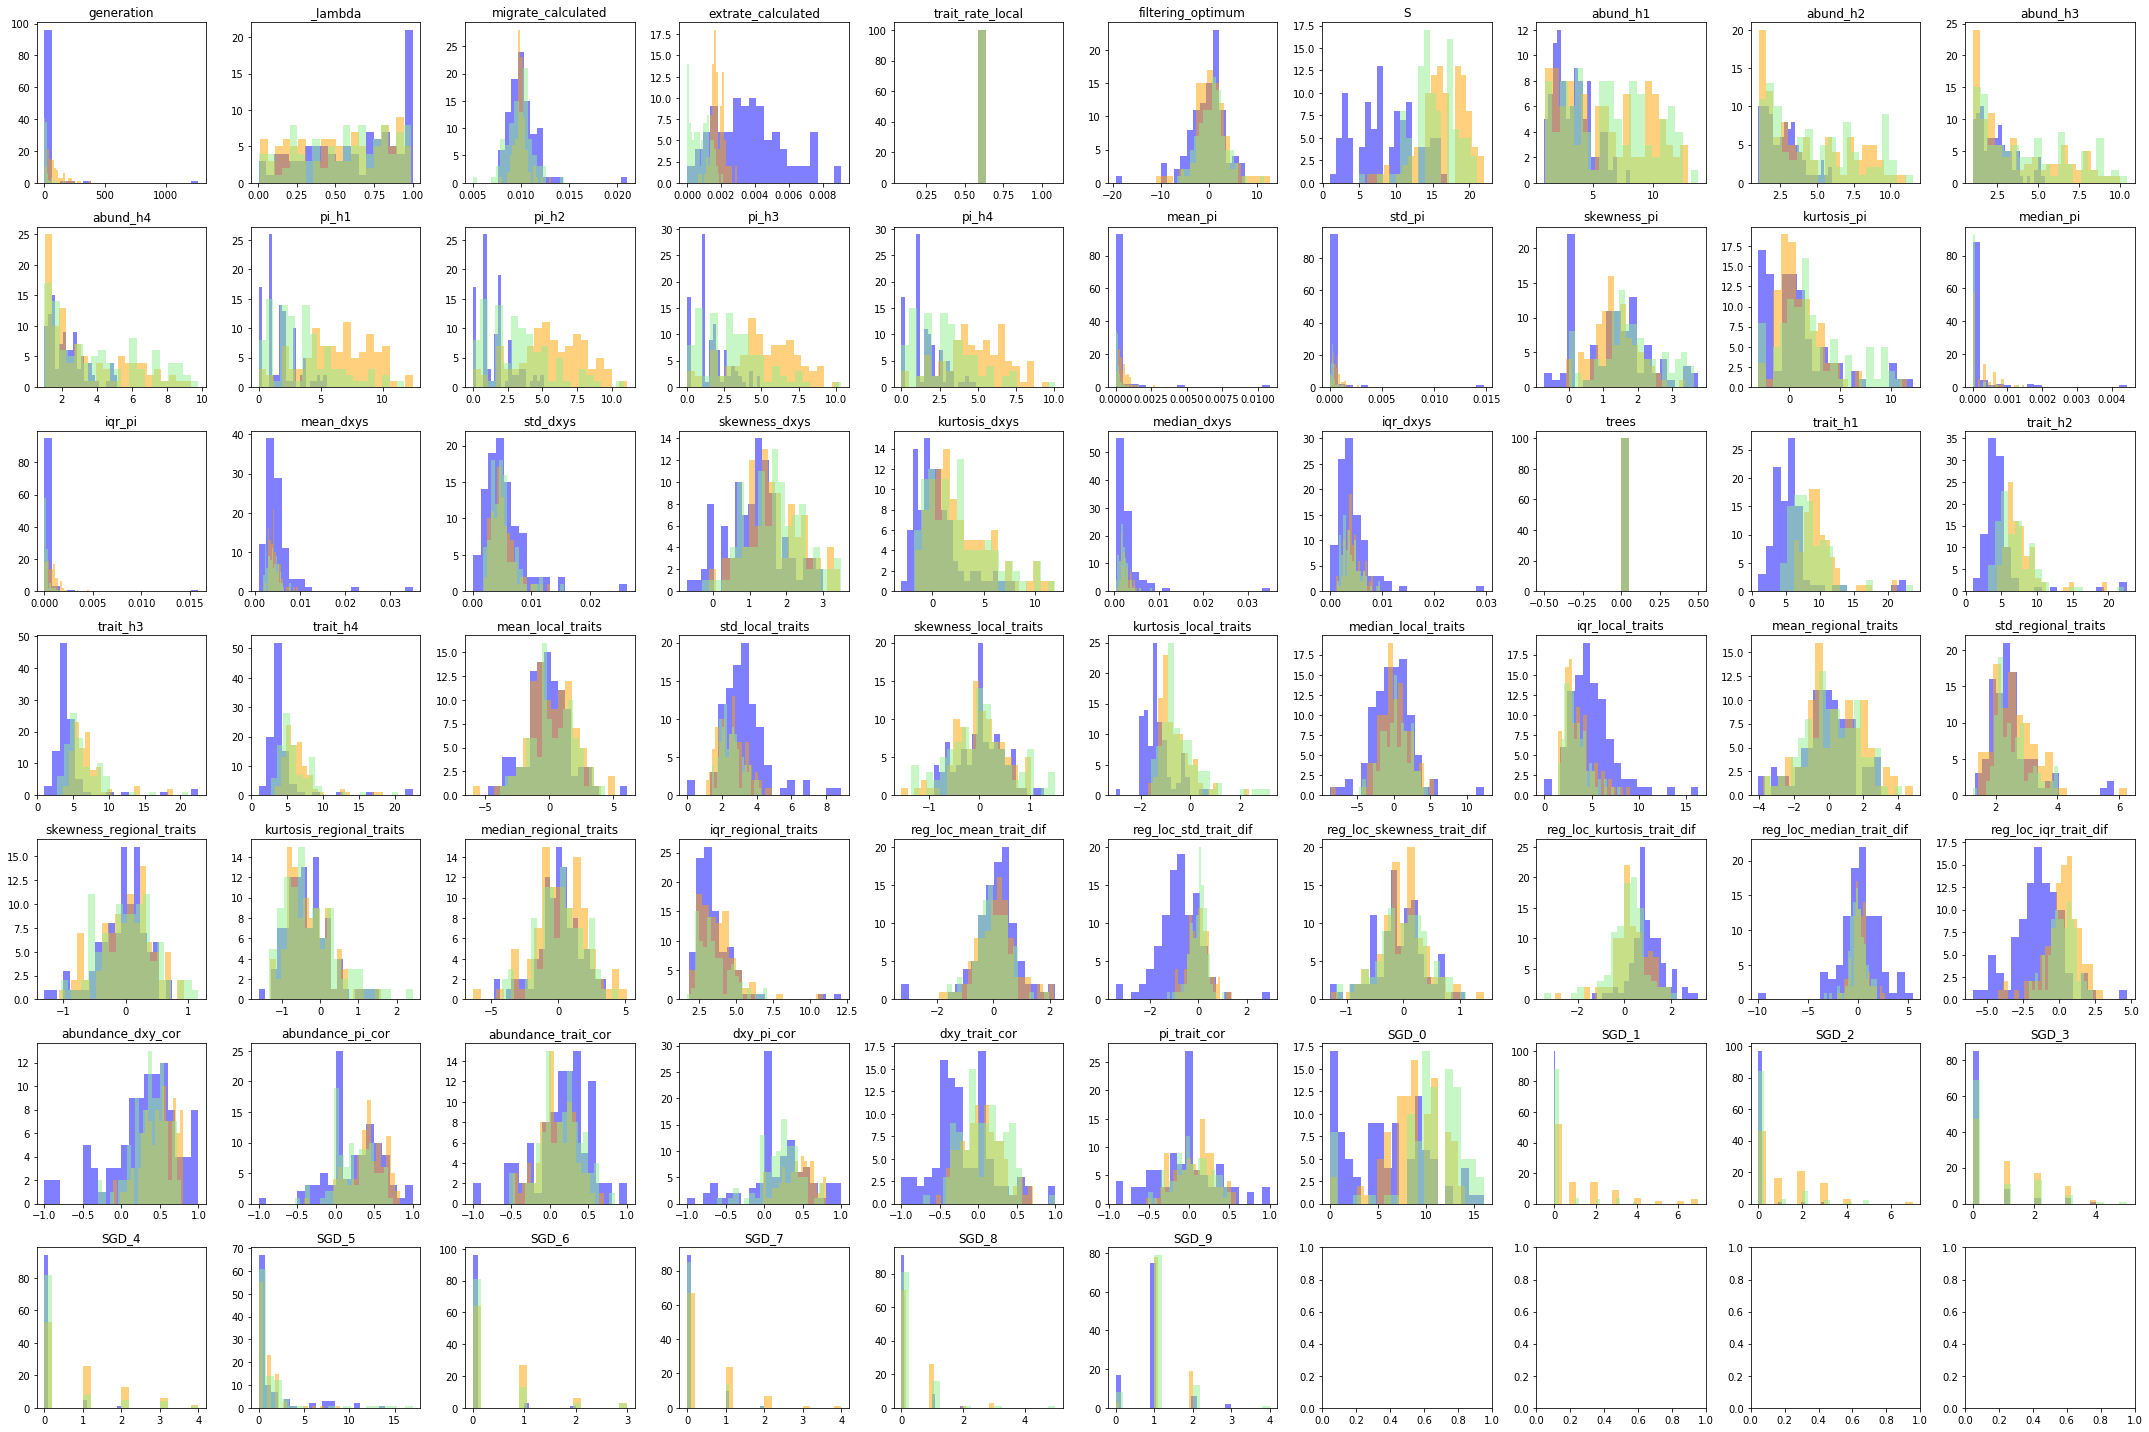

In [57]:
# This is annoying, so we can plot them in one giant figure
# Mean is blue
# pairwise is orange
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes
for p, ax in zip(list(cmp_mean_res0.columns)[15:], axs):
    ax.hist(cmp_mean_res0[p], color='blue', bins=20, alpha=0.5)
    ax.hist(cmp_pw_res0[p], color='orange', bins=20, alpha=0.5)
    ax.hist(cmp_pw_old[p], color='lightgreen',bins=20, alpha=0.5)
    ax.set_title(p)
fig.tight_layout()

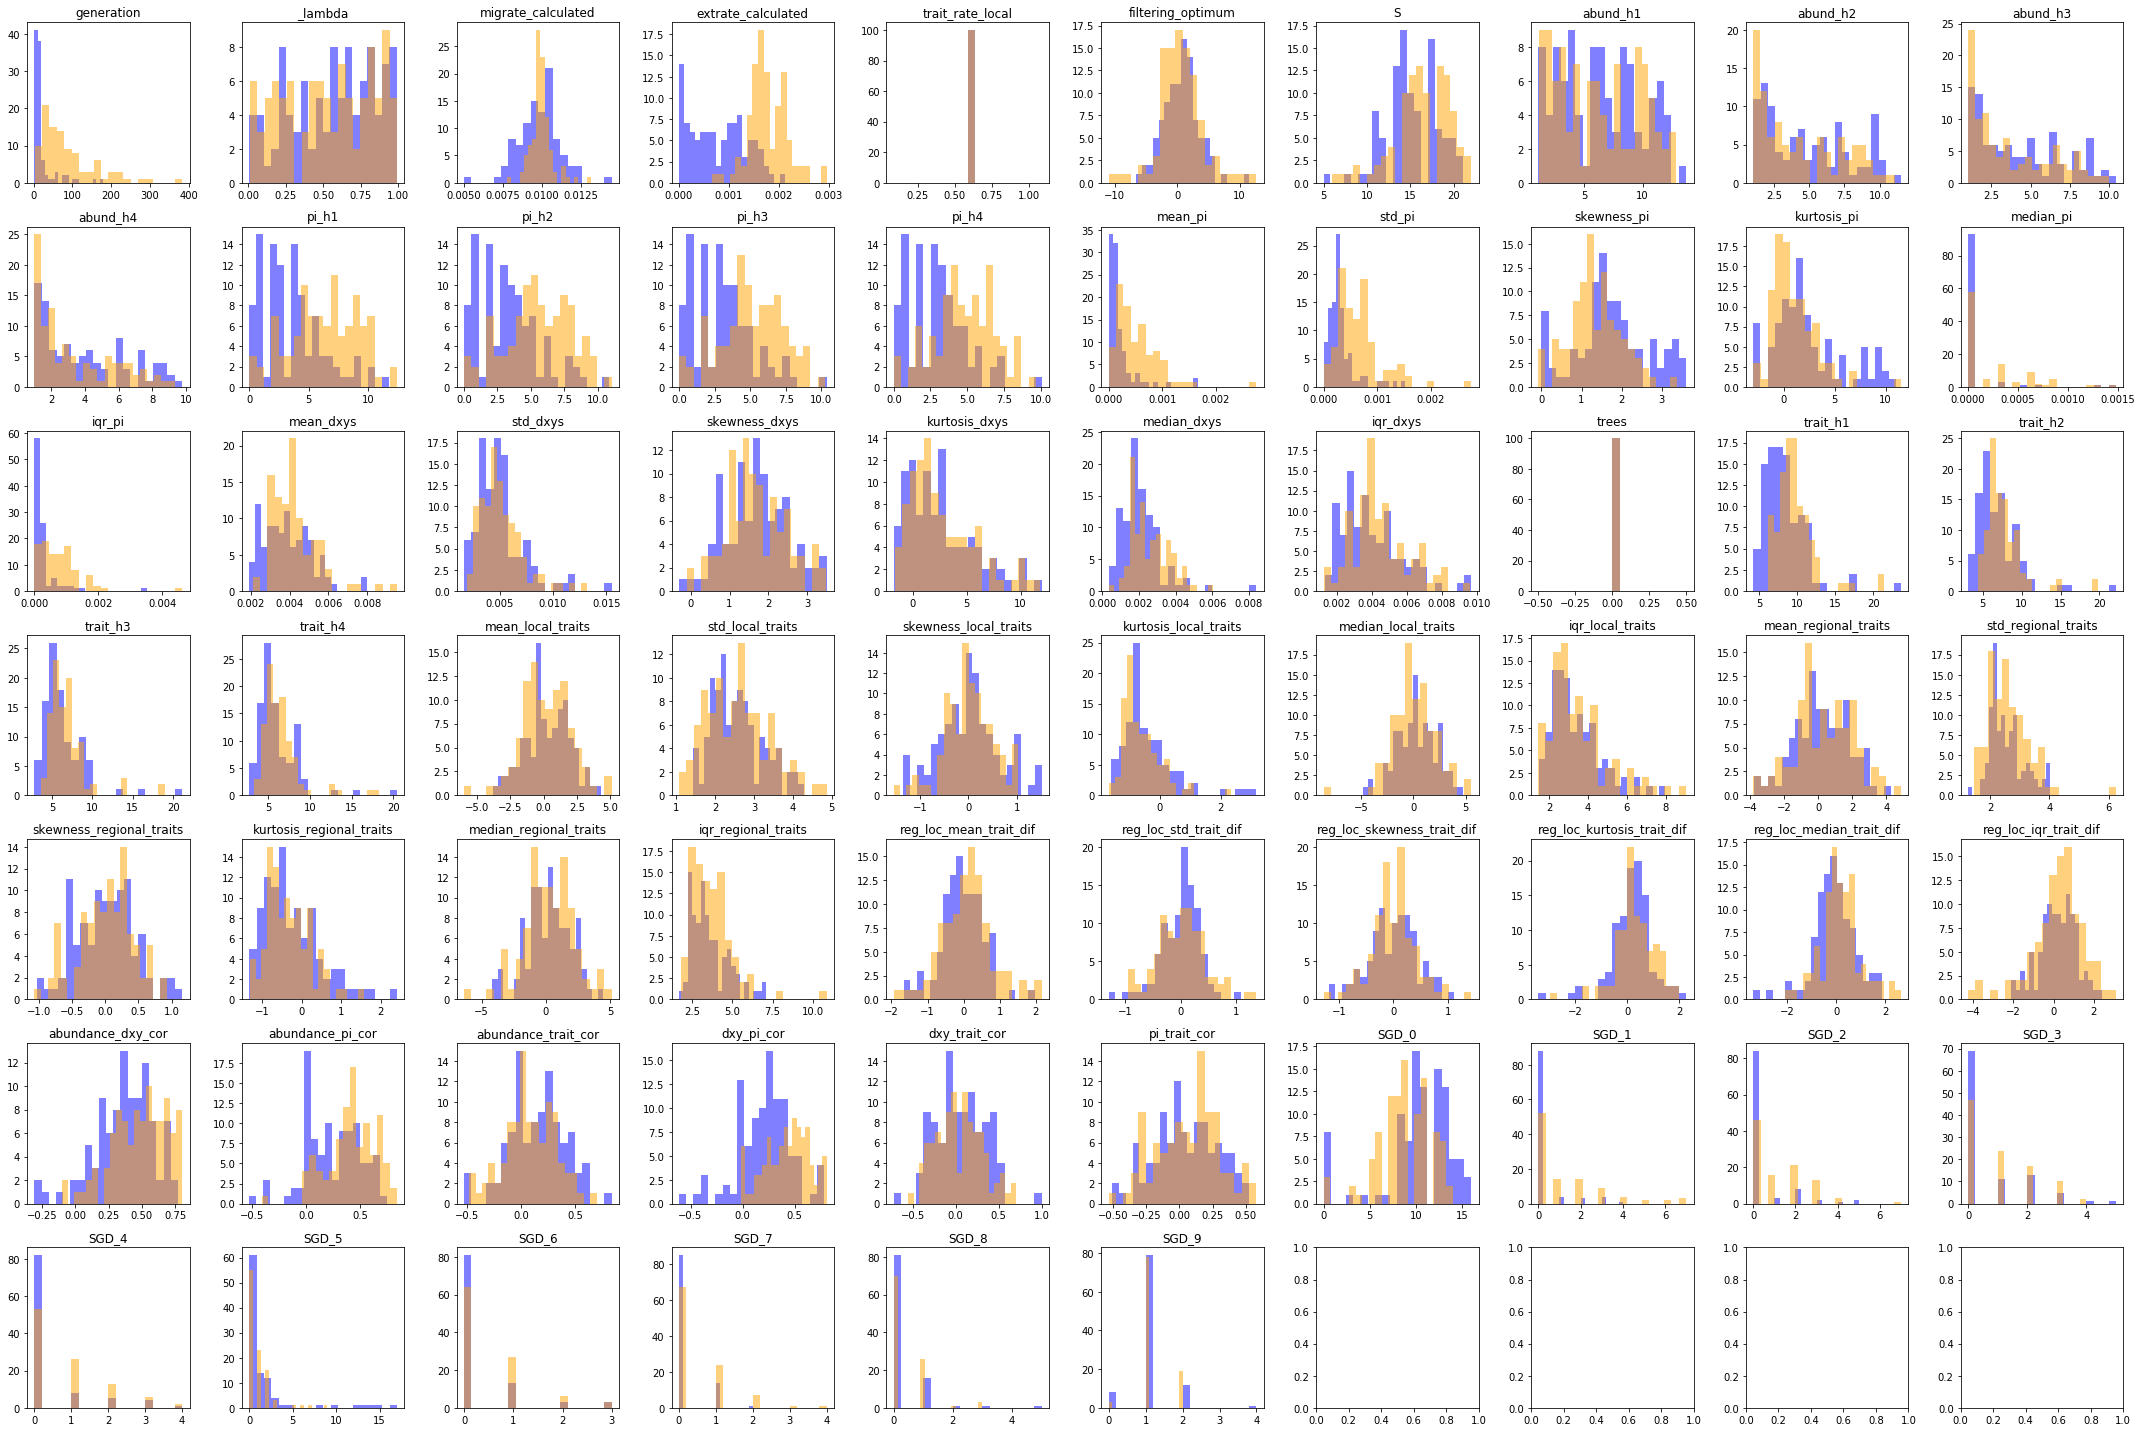

In [54]:
# This is annoying, so we can plot them in one giant figure
# Old is blue
# pairwise is orange
# Compare previous version of pw with new
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes
for p, ax in zip(list(cmp_mean_res0.columns)[15:], axs):
    ax.hist(cmp_pw_old[p], color='blue', bins=20, alpha=0.5)
    ax.hist(cmp_pw_res0[p], color='orange', bins=20, alpha=0.5)
    ax.set_title(p)
fig.tight_layout()